In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [3]:
#Generate an image
# A 200x200 image with a big white square at the centre
image = np.zeros((200, 200), dtype=np.uint8)

####--- parameters --------
line_color = 255
line_width = 20

#---- horizontal and vertical begin --------#
h_begin = 50
h_end = 150
v_begin = 50
v_end = 150

vm_begin = 100 - int(line_width/2)
vm_end = 100 + int(line_width/2)
#------------------------------------------------

# Draw the letter H
# left vertical strip
image[v_begin:v_end, h_begin:(h_begin+line_width)] = line_color

# right vertical strip
image[v_begin:v_end, (h_end-line_width):h_end] = line_color

# middle strip
image[vm_begin:vm_end, h_begin:h_end] = line_color

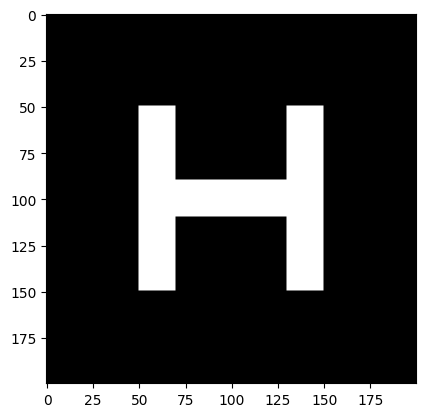

In [4]:
#show image
#plt.imshow(image)
plt.imshow(image, cmap='gray')

In [5]:
# Sobel detection
# x-kernel 
sobelx = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])

#y-kernel
sobely = np.array([[-1, -2, -1],[ 0,  0,  0],[ 1,  2,  1]])

In [6]:
# First derivative Ix
Ix = signal.convolve2d(image, sobelx, "same")
Iy = signal.convolve2d(image, sobely, "same")

#--- scale non-zero values to 255
Ix[Ix != 0] = 255
Iy[Iy != 0] = 255

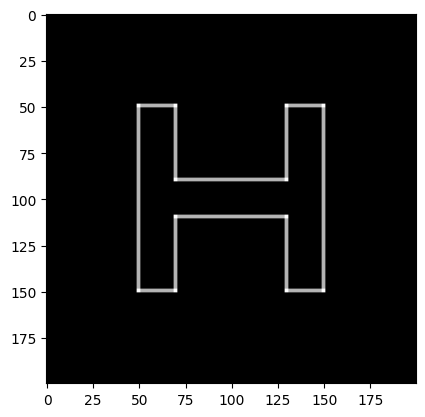

In [7]:
# Find the sobel operator Sobel=sqrt( Ix*Ix + Iy*Iy )
Sobel = np.sqrt((Ix*Ix) + (Iy*Iy))
plt.imshow(Sobel, cmap='gray')

In [8]:
# Get the second derivative Ixx 
Ixx = signal.convolve2d(Ix, sobelx, "same")     
# Iyy  
Iyy = signal.convolve2d(Iy, sobely, "same")
# Ixy Image 
Ixy = signal.convolve2d(Ix, sobely, "same")

In [9]:
# Calcualte herssian matrix
Hm = np.array([[Ixx, Ixy],[Ixy, Iyy]])

In [10]:
# Get Determinant (2 ways to calculate)
det = Ixx*Iyy - Ixy**2
det2 = np.linalg.det(Hm)

# Trace is the sum of the diagonal elements (2 ways to calculate)
trace = Ixx + Iyy
trace2 = np.trace(Hm)

# Harris is det(H) - a * trace(H), where a is constant 
H = det - 0.2 * trace

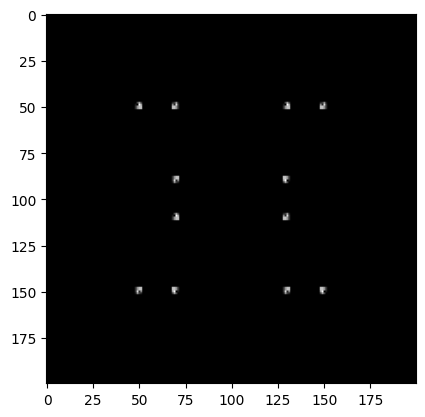

In [11]:
plt.imshow(np.abs(H), cmap='gray')

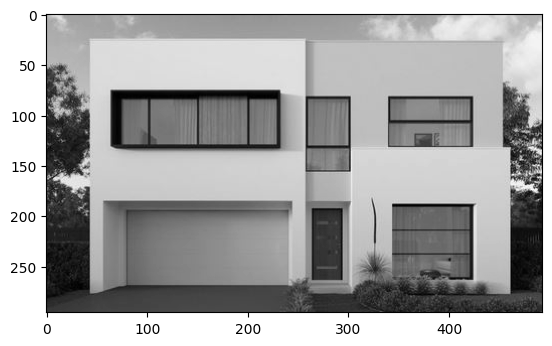

In [17]:
house_img = plt.imread("images/house.JPG")
house_img = np.dot(house_img[...,:3], [0.2989, 0.5870, 0.1140])
plt.imshow(house_img, cmap="gray")

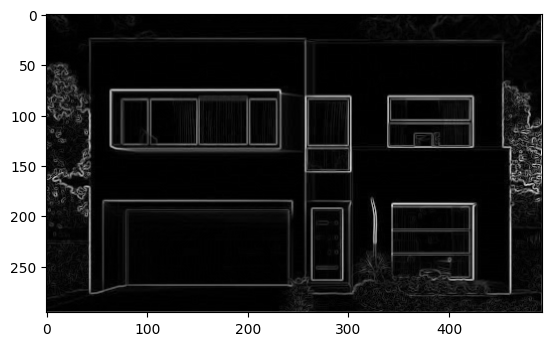

In [23]:
# Sobel detection
# x-kernel 
sobelx = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])

#y-kernel
sobely = np.array([[-1, -2, -1],[ 0,  0,  0],[ 1,  2,  1]])

# First derivative Ix
house_Ix = signal.convolve2d(house_img, sobelx, "same")
house_Iy = signal.convolve2d(house_img, sobely, "same")

# Find the sobel operator Sobel=sqrt( Ix*Ix + Iy*Iy )
house_sobel = np.sqrt((house_Ix * house_Ix) + (house_Iy * house_Iy))
plt.imshow(house_sobel, cmap='gray')

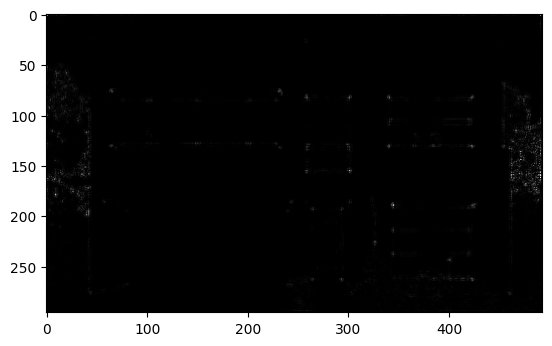

In [32]:
# Get the second derivative Ixx 
house_Ixx = signal.convolve2d(house_Ix, sobelx, "same")     
# Iyy  
house_Iyy = signal.convolve2d(house_Iy, sobely, "same")
# Ixy Image 
house_Ixy = signal.convolve2d(house_Ix, sobely, "same")

# Calcualte herssian matrix
house_Hm = np.array([[house_Ixx, house_Ixy],[house_Ixy, house_Iyy]])

# Get determinant
house_det = house_Ixx * house_Iyy - house_Ixy ** 2

# Get trace
house_trace = house_Ixx + house_Iyy

# det(H) - a * trace(H), where a is constant 
house_H = house_det - 0.1 * house_trace

plt.imshow(np.abs(house_H), cmap='gray')